In [1]:
import pandas as pd
import numpy as np
from tqdm import tqdm
import os
import matplotlib.pyplot as plt
import seaborn as sns

import sklearn
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import KFold

from tensorflow import keras
from keras.models import Sequential
from keras import Input
from keras.layers import Dense
from tensorflow.keras.callbacks import ModelCheckpoint
from keras.models import load_model
from keras.callbacks import EarlyStopping

from lightgbm import LGBMRegressor
import random
import xgboost as xgb

In [2]:
curr_dir = os.getcwd()
curr_dir

'C:\\weather\\smart_farm'

In [4]:
forders_tr = os.listdir(curr_dir+"\\data")
forders_tr

['smart_farm.csv']

In [ ]:
# train = pd.DataFrame()

# for files in s:
#     df= pd.read_csv(os.path.join(curr_dir+"\\data\\"+"\\fin_train_val\\")+files)
#     train = pd.concat([train, df])
    
# train.drop('idx', axis=1, inplace=True)
# train

In [8]:
df = pd.read_csv(os.path.join(curr_dir+"\\data\\")+forders_tr[0])
df = df.drop(df.columns[0], axis=1)
df

,smart_farm.yy,smart_farm.mm,smart_farm.dd,smart_farm.hh,smart_farm.nn,smart_farm.insolation,smart_farm.out_tmperature,smart_farm.out_humidity,smart_farm.wind_speed,smart_farm.wind_direction,...,smart_farm.shield_tmperature_h,smart_farm.shield_energy_h,smart_farm.shield_energy_v,smart_farm.exhaust_fan,smart_farm.ceiling,smart_farm.floating_fan,smart_farm.fan_coil_b_site,smart_farm.ventilation_temperature_control,smart_farm.heating_temperature_set_up,smart_farm.heat_supply
0,2021,11,26,0,0,-2.7,5.8,67,0.0,325,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,28.0,18.0,0.9
1,2021,11,26,0,1,-2.9,5.8,67,0.4,344,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,28.0,18.0,0.9
2,2021,11,26,0,2,-3.0,5.7,67,0.9,105,...,0.0,0.0,0.0,0.0,0.0,1.0,1.0,28.0,18.0,0.9
3,2021,11,26,0,3,-3.0,5.7,67,1.3,123,...,0.0,0.0,0.0,0.0,0.0,1.0,1.0,28.0,18.0,0.8
4,2021,11,26,0,4,-2.8,5.7,67,0.9,123,...,0.0,0.0,0.0,0.0,0.0,1.0,1.0,28.0,18.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
152635,2022,3,20,23,55,-3.0,6.2,61,0.4,344,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,28.0,18.0,NaN
152636,2022,3,20,23,56,-3.2,6.2,61,0.0,344,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,28.0,18.0,NaN
152637,2022,3,20,23,57,-3.2,6.1,61,0.4,344,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,28.0,18.0,NaN
152638,2022,3,20,23,58,-3.3,6.1,61,0.4,346,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,28.0,18.0,NaN


In [24]:
df2022 = df[df['smart_farm.yy']==2022]
df2022
df202203 = df2022[df2022['smart_farm.mm']==3]
df202203
# test = test.reset_index()
# test = test.drop('index', axis=1)
# test

,smart_farm.yy,smart_farm.mm,smart_farm.dd,smart_farm.hh,smart_farm.nn,smart_farm.insolation,smart_farm.out_tmperature,smart_farm.out_humidity,smart_farm.wind_speed,smart_farm.wind_direction,...,smart_farm.shield_tmperature_h,smart_farm.shield_energy_h,smart_farm.shield_energy_v,smart_farm.exhaust_fan,smart_farm.ceiling,smart_farm.floating_fan,smart_farm.fan_coil_b_site,smart_farm.ventilation_temperature_control,smart_farm.heating_temperature_set_up,smart_farm.heat_supply
132480,2022,3,4,0,0,-4.0,2.0,76,0.0,5,...,0.0,0.0,0.0,0.0,0.0,1.0,1.0,28.0,18.0,NaN
132481,2022,3,4,0,1,-4.1,2.0,76,0.4,5,...,0.0,0.0,0.0,0.0,0.0,1.0,1.0,28.0,18.0,NaN
132482,2022,3,4,0,2,-4.1,1.9,76,0.0,5,...,0.0,0.0,0.0,0.0,0.0,1.0,1.0,28.0,18.0,NaN
132483,2022,3,4,0,3,-4.1,1.9,76,0.0,5,...,0.0,0.0,0.0,0.0,0.0,1.0,1.0,28.0,18.0,NaN
132484,2022,3,4,0,4,-4.2,1.9,76,0.0,5,...,0.0,0.0,0.0,0.0,0.0,1.0,1.0,28.0,18.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
152635,2022,3,20,23,55,-3.0,6.2,61,0.4,344,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,28.0,18.0,NaN
152636,2022,3,20,23,56,-3.2,6.2,61,0.0,344,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,28.0,18.0,NaN
152637,2022,3,20,23,57,-3.2,6.1,61,0.4,344,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,28.0,18.0,NaN
152638,2022,3,20,23,58,-3.3,6.1,61,0.4,346,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,28.0,18.0,NaN


In [86]:
train = df.iloc[:132480]
train = train.reset_index()
train = train.drop('index', axis=1)

test = df.iloc[132480:]
test = test[test['smart_farm.dd']!=15]        # 15일자 제외
test = test.reset_index()
test = test.drop('index', axis=1)
test

,smart_farm.yy,smart_farm.mm,smart_farm.dd,smart_farm.hh,smart_farm.nn,smart_farm.insolation,smart_farm.out_tmperature,smart_farm.out_humidity,smart_farm.wind_speed,smart_farm.wind_direction,...,smart_farm.shield_tmperature_h,smart_farm.shield_energy_h,smart_farm.shield_energy_v,smart_farm.exhaust_fan,smart_farm.ceiling,smart_farm.floating_fan,smart_farm.fan_coil_b_site,smart_farm.ventilation_temperature_control,smart_farm.heating_temperature_set_up,smart_farm.heat_supply
0,2022,3,4,0,0,-4.0,2.0,76,0.0,5,...,0.0,0.0,0.0,0.0,0.0,1.0,1.0,28.0,18.0,NaN
1,2022,3,4,0,1,-4.1,2.0,76,0.4,5,...,0.0,0.0,0.0,0.0,0.0,1.0,1.0,28.0,18.0,NaN
2,2022,3,4,0,2,-4.1,1.9,76,0.0,5,...,0.0,0.0,0.0,0.0,0.0,1.0,1.0,28.0,18.0,NaN
3,2022,3,4,0,3,-4.1,1.9,76,0.0,5,...,0.0,0.0,0.0,0.0,0.0,1.0,1.0,28.0,18.0,NaN
4,2022,3,4,0,4,-4.2,1.9,76,0.0,5,...,0.0,0.0,0.0,0.0,0.0,1.0,1.0,28.0,18.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18715,2022,3,20,23,55,-3.0,6.2,61,0.4,344,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,28.0,18.0,NaN
18716,2022,3,20,23,56,-3.2,6.2,61,0.0,344,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,28.0,18.0,NaN
18717,2022,3,20,23,57,-3.2,6.1,61,0.4,344,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,28.0,18.0,NaN
18718,2022,3,20,23,58,-3.3,6.1,61,0.4,346,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,28.0,18.0,NaN


In [119]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18720 entries, 0 to 18719
Data columns (total 23 columns):
 #   Column                                      Non-Null Count  Dtype  
---  ------                                      --------------  -----  
 0   smart_farm.yy                               18720 non-null  int64  
 1   smart_farm.mm                               18720 non-null  int64  
 2   smart_farm.dd                               18720 non-null  int64  
 3   smart_farm.hh                               18720 non-null  int64  
 4   smart_farm.nn                               18720 non-null  int64  
 5   smart_farm.insolation                       18720 non-null  float64
 6   smart_farm.out_tmperature                   18720 non-null  float64
 7   smart_farm.out_humidity                     18720 non-null  int64  
 8   smart_farm.wind_speed                       18720 non-null  float64
 9   smart_farm.wind_direction                   18720 non-null  int64  
 10  smart_farm

In [57]:
test[test['smart_farm.dd']==4]    # 1440 개씩

,smart_farm.yy,smart_farm.mm,smart_farm.dd,smart_farm.hh,smart_farm.nn,smart_farm.insolation,smart_farm.out_tmperature,smart_farm.out_humidity,smart_farm.wind_speed,smart_farm.wind_direction,...,smart_farm.shield_tmperature_h,smart_farm.shield_energy_h,smart_farm.shield_energy_v,smart_farm.exhaust_fan,smart_farm.ceiling,smart_farm.floating_fan,smart_farm.fan_coil_b_site,smart_farm.ventilation_temperature_control,smart_farm.heating_temperature_set_up,smart_farm.heat_supply
0,2022,3,4,0,0,-4.0,2.0,76,0.0,5,...,0.0,0.0,0.0,0.0,0.0,1.0,1.0,28.0,18.0,NaN
1,2022,3,4,0,1,-4.1,2.0,76,0.4,5,...,0.0,0.0,0.0,0.0,0.0,1.0,1.0,28.0,18.0,NaN
2,2022,3,4,0,2,-4.1,1.9,76,0.0,5,...,0.0,0.0,0.0,0.0,0.0,1.0,1.0,28.0,18.0,NaN
3,2022,3,4,0,3,-4.1,1.9,76,0.0,5,...,0.0,0.0,0.0,0.0,0.0,1.0,1.0,28.0,18.0,NaN
4,2022,3,4,0,4,-4.2,1.9,76,0.0,5,...,0.0,0.0,0.0,0.0,0.0,1.0,1.0,28.0,18.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1435,2022,3,4,23,55,-1.9,10.6,65,0.9,182,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,28.0,18.0,NaN
1436,2022,3,4,23,56,-2.0,10.5,65,0.9,182,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,28.0,18.0,NaN
1437,2022,3,4,23,57,-2.0,10.5,66,0.4,160,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,28.0,18.0,NaN
1438,2022,3,4,23,58,-2.1,10.5,66,1.8,152,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,28.0,18.0,NaN


In [78]:
test['smart_farm.dd'].value_counts()

4     1440
5     1440
6     1440
7     1440
8     1440
9     1440
10    1440
11    1440
12    1440
13    1440
15    1440
18    1440
19    1440
20    1440
Name: smart_farm.dd, dtype: int64

In [79]:
submission1

,yy,mm,dd,heat_supply_day1,heat_supply_day2
0,2022,3,4,NaN,NaN
1,2022,3,5,NaN,NaN
2,2022,3,6,NaN,NaN
3,2022,3,7,NaN,NaN
4,2022,3,8,NaN,NaN
5,2022,3,9,NaN,NaN
6,2022,3,10,NaN,NaN
7,2022,3,11,NaN,NaN
8,2022,3,12,NaN,NaN
9,2022,3,13,NaN,NaN


In [56]:
# set(list(test['smart_farm.hh']))        # 0~23
# set(list(test['smart_farm.nn']))          # 0~59

In [44]:
# mask = train.isna()
# train1 = train[~mask]
# train1.info()
train1 = train.dropna(axis=0)
train1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 130816 entries, 0 to 132479
Data columns (total 23 columns):
 #   Column                                      Non-Null Count   Dtype  
---  ------                                      --------------   -----  
 0   smart_farm.yy                               130816 non-null  int64  
 1   smart_farm.mm                               130816 non-null  int64  
 2   smart_farm.dd                               130816 non-null  int64  
 3   smart_farm.hh                               130816 non-null  int64  
 4   smart_farm.nn                               130816 non-null  int64  
 5   smart_farm.insolation                       130816 non-null  float64
 6   smart_farm.out_tmperature                   130816 non-null  float64
 7   smart_farm.out_humidity                     130816 non-null  int64  
 8   smart_farm.wind_speed                       130816 non-null  float64
 9   smart_farm.wind_direction                   130816 non-null  int64  
 

<AxesSubplot:>

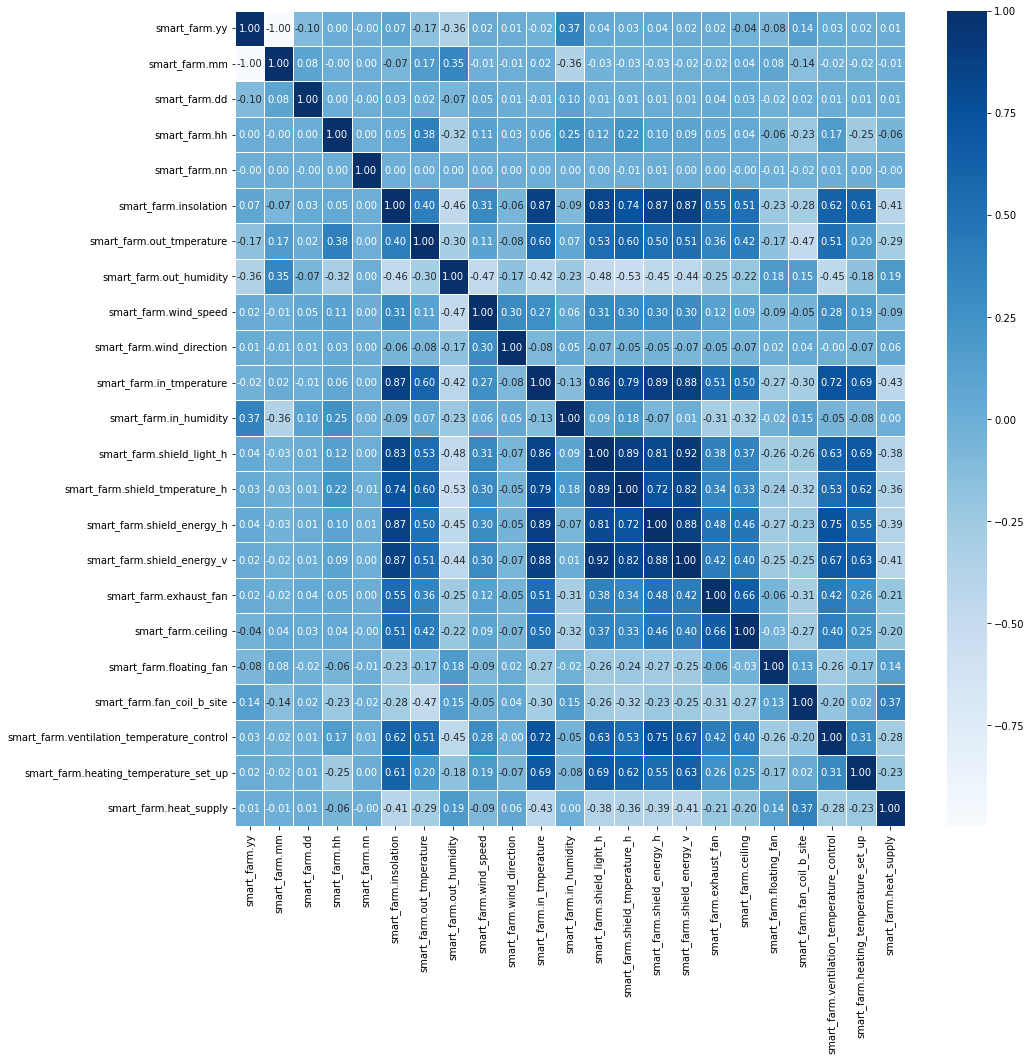

In [45]:
plt.figure(figsize=(15,15))
sns.heatmap(data = train1.corr(), annot=True, 
fmt = '.2f', linewidths=.5, cmap='Blues')

In [13]:
submission = pd.read_csv('2-1_검증데이터셋.csv')
submission1 = submission.copy()
submission1             # "년도 월 일 시 분 => 년도 월 일"  예측

,yy,mm,dd,heat_supply_day1,heat_supply_day2
0,2022,3,4,NaN,NaN
1,2022,3,5,NaN,NaN
2,2022,3,6,NaN,NaN
3,2022,3,7,NaN,NaN
4,2022,3,8,NaN,NaN
5,2022,3,9,NaN,NaN
6,2022,3,10,NaN,NaN
7,2022,3,11,NaN,NaN
8,2022,3,12,NaN,NaN
9,2022,3,13,NaN,NaN


# Model

In [49]:
train.columns

Index(['smart_farm.yy', 'smart_farm.mm', 'smart_farm.dd', 'smart_farm.hh',
       'smart_farm.nn', 'smart_farm.insolation', 'smart_farm.out_tmperature',
       'smart_farm.out_humidity', 'smart_farm.wind_speed',
       'smart_farm.wind_direction', 'smart_farm.in_tmperature',
       'smart_farm.in_humidity', 'smart_farm.shield_light_h',
       'smart_farm.shield_tmperature_h', 'smart_farm.shield_energy_h',
       'smart_farm.shield_energy_v', 'smart_farm.exhaust_fan',
       'smart_farm.ceiling', 'smart_farm.floating_fan',
       'smart_farm.fan_coil_b_site',
       'smart_farm.ventilation_temperature_control',
       'smart_farm.heating_temperature_set_up', 'smart_farm.heat_supply'],
      dtype='object')

In [47]:
max_depth = 5
n_estimators = 5000             # 400  #1000
lr = 0.01                     # 0.017
num_leaves = 31
early_stopping_rounds = 300      # 100
verbose = True                  # True

In [90]:
X = train.drop(['smart_farm.yy', 'smart_farm.mm', 'smart_farm.dd', 'smart_farm.hh', 'smart_farm.nn', 'smart_farm.heat_supply'], axis=1)
y = train[['smart_farm.heat_supply']].values

X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.3)

X_test = test.drop(['smart_farm.yy', 'smart_farm.mm', 'smart_farm.dd', 'smart_farm.hh', 'smart_farm.nn', 'smart_farm.heat_supply'],axis=1)

In [50]:
# X_train = train.drop(['smart_farm.yy', 'smart_farm.mm', 'smart_farm.dd', 'smart_farm.hh', 'smart_farm.nn', 'smart_farm.heat_supply'], axis=1)
# X_val = val.drop(['smart_farm.yy', 'smart_farm.mm', 'smart_farm.dd', 'smart_farm.hh', 'smart_farm.nn', 'smart_farm.heat_supply'],axis=1)

# y_train = train[['smart_farm.heat_supply']].values
# y_val = val[['smart_farm.heat_supply']].values

lgbm_reg = LGBMRegressor(objective= "regression",
                     max_depth= max_depth,
                     n_estimators= n_estimators,
                     learning_rate= lr,
                     num_leaves = num_leaves)
    
lgbm_reg.fit(X_train, y_train,
          eval_set=[(X_val, y_val)],
          eval_metric=["mse"],
          early_stopping_rounds=early_stopping_rounds,
          verbose=verbose) 


C:\Users\wjd72\anaconda3\envs\tensorflow_env\lib\site-packages\lightgbm\sklearn.py:726: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
C:\Users\wjd72\anaconda3\envs\tensorflow_env\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
C:\Users\wjd72\anaconda3\envs\tensorflow_env\lib\site-packages\lightgbm\basic.py:179: UserWarning: Converting column-vector to 1d array
  _log_warning('Converting column-vector to 1d array')


[1]	valid_0's l2: 0.0990854
[2]	valid_0's l2: 0.0984068
[3]	valid_0's l2: 0.097743
[4]	valid_0's l2: 0.097091
[5]	valid_0's l2: 0.0964533
[6]	valid_0's l2: 0.0958271
[7]	valid_0's l2: 0.0952144
[8]	valid_0's l2: 0.0946127
[9]	valid_0's l2: 0.0940177
[10]	valid_0's l2: 0.0934402
[11]	valid_0's l2: 0.0928683
[12]	valid_0's l2: 0.0923131
[13]	valid_0's l2: 0.0917635
[14]	valid_0's l2: 0.09123
[15]	valid_0's l2: 0.0907015
[16]	valid_0's l2: 0.0901805
[17]	valid_0's l2: 0.0896781
[18]	valid_0's l2: 0.0891795
[19]	valid_0's l2: 0.0886896
[20]	valid_0's l2: 0.0882111
[21]	valid_0's l2: 0.0877403
[22]	valid_0's l2: 0.0872852
[23]	valid_0's l2: 0.086833
[24]	valid_0's l2: 0.0863882
[25]	valid_0's l2: 0.0859541
[26]	valid_0's l2: 0.0855329
[27]	valid_0's l2: 0.0851158
[28]	valid_0's l2: 0.0847045
[29]	valid_0's l2: 0.0843073
[30]	valid_0's l2: 0.0839176
[31]	valid_0's l2: 0.0835295
[32]	valid_0's l2: 0.0831513
[33]	valid_0's l2: 0.0827829
[34]	valid_0's l2: 0.0824193
[35]	valid_0's l2: 0.08206
[

[281]	valid_0's l2: 0.0601217
[282]	valid_0's l2: 0.0601047
[283]	valid_0's l2: 0.0600907
[284]	valid_0's l2: 0.0600762
[285]	valid_0's l2: 0.0600628
[286]	valid_0's l2: 0.0600489
[287]	valid_0's l2: 0.0600326
[288]	valid_0's l2: 0.0600195
[289]	valid_0's l2: 0.0600066
[290]	valid_0's l2: 0.0599906
[291]	valid_0's l2: 0.0599773
[292]	valid_0's l2: 0.0599649
[293]	valid_0's l2: 0.0599531
[294]	valid_0's l2: 0.0599376
[295]	valid_0's l2: 0.0599246
[296]	valid_0's l2: 0.0599126
[297]	valid_0's l2: 0.059898
[298]	valid_0's l2: 0.0598856
[299]	valid_0's l2: 0.0598726
[300]	valid_0's l2: 0.0598571
[301]	valid_0's l2: 0.0598456
[302]	valid_0's l2: 0.0598335
[303]	valid_0's l2: 0.0598187
[304]	valid_0's l2: 0.0598041
[305]	valid_0's l2: 0.0597883
[306]	valid_0's l2: 0.0597774
[307]	valid_0's l2: 0.0597641
[308]	valid_0's l2: 0.0597529
[309]	valid_0's l2: 0.0597381
[310]	valid_0's l2: 0.0597255
[311]	valid_0's l2: 0.0597144
[312]	valid_0's l2: 0.0597025
[313]	valid_0's l2: 0.0596889
[314]	valid

[581]	valid_0's l2: 0.0569712
[582]	valid_0's l2: 0.0569667
[583]	valid_0's l2: 0.0569589
[584]	valid_0's l2: 0.0569541
[585]	valid_0's l2: 0.0569509
[586]	valid_0's l2: 0.0569458
[587]	valid_0's l2: 0.0569374
[588]	valid_0's l2: 0.056932
[589]	valid_0's l2: 0.0569304
[590]	valid_0's l2: 0.0569232
[591]	valid_0's l2: 0.05691
[592]	valid_0's l2: 0.0569054
[593]	valid_0's l2: 0.0569015
[594]	valid_0's l2: 0.0568984
[595]	valid_0's l2: 0.0568918
[596]	valid_0's l2: 0.0568851
[597]	valid_0's l2: 0.0568813
[598]	valid_0's l2: 0.0568797
[599]	valid_0's l2: 0.0568685
[600]	valid_0's l2: 0.0568653
[601]	valid_0's l2: 0.0568609
[602]	valid_0's l2: 0.0568537
[603]	valid_0's l2: 0.0568394
[604]	valid_0's l2: 0.0568364
[605]	valid_0's l2: 0.0568301
[606]	valid_0's l2: 0.0568276
[607]	valid_0's l2: 0.0568237
[608]	valid_0's l2: 0.0568176
[609]	valid_0's l2: 0.0568096
[610]	valid_0's l2: 0.0567987
[611]	valid_0's l2: 0.0567959
[612]	valid_0's l2: 0.0567924
[613]	valid_0's l2: 0.0567835
[614]	valid_0

[875]	valid_0's l2: 0.0555051
[876]	valid_0's l2: 0.0554986
[877]	valid_0's l2: 0.0554958
[878]	valid_0's l2: 0.0554923
[879]	valid_0's l2: 0.0554849
[880]	valid_0's l2: 0.0554784
[881]	valid_0's l2: 0.0554764
[882]	valid_0's l2: 0.0554744
[883]	valid_0's l2: 0.0554695
[884]	valid_0's l2: 0.0554637
[885]	valid_0's l2: 0.0554607
[886]	valid_0's l2: 0.0554592
[887]	valid_0's l2: 0.0554514
[888]	valid_0's l2: 0.0554501
[889]	valid_0's l2: 0.0554473
[890]	valid_0's l2: 0.0554461
[891]	valid_0's l2: 0.0554404
[892]	valid_0's l2: 0.0554348
[893]	valid_0's l2: 0.0554312
[894]	valid_0's l2: 0.0554295
[895]	valid_0's l2: 0.0554242
[896]	valid_0's l2: 0.0554165
[897]	valid_0's l2: 0.0554163
[898]	valid_0's l2: 0.0554145
[899]	valid_0's l2: 0.0554094
[900]	valid_0's l2: 0.0554049
[901]	valid_0's l2: 0.0554047
[902]	valid_0's l2: 0.0554024
[903]	valid_0's l2: 0.0553951
[904]	valid_0's l2: 0.0553934
[905]	valid_0's l2: 0.0553913
[906]	valid_0's l2: 0.0553867
[907]	valid_0's l2: 0.0553834
[908]	vali

[1183]	valid_0's l2: 0.0542612
[1184]	valid_0's l2: 0.0542598
[1185]	valid_0's l2: 0.0542528
[1186]	valid_0's l2: 0.0542516
[1187]	valid_0's l2: 0.0542464
[1188]	valid_0's l2: 0.054245
[1189]	valid_0's l2: 0.0542433
[1190]	valid_0's l2: 0.0542402
[1191]	valid_0's l2: 0.0542347
[1192]	valid_0's l2: 0.0542334
[1193]	valid_0's l2: 0.0542325
[1194]	valid_0's l2: 0.0542311
[1195]	valid_0's l2: 0.0542255
[1196]	valid_0's l2: 0.054222
[1197]	valid_0's l2: 0.0542206
[1198]	valid_0's l2: 0.0542174
[1199]	valid_0's l2: 0.054212
[1200]	valid_0's l2: 0.0542098
[1201]	valid_0's l2: 0.0542044
[1202]	valid_0's l2: 0.0542022
[1203]	valid_0's l2: 0.0542008
[1204]	valid_0's l2: 0.0541945
[1205]	valid_0's l2: 0.0541916
[1206]	valid_0's l2: 0.05419
[1207]	valid_0's l2: 0.0541836
[1208]	valid_0's l2: 0.0541823
[1209]	valid_0's l2: 0.054179
[1210]	valid_0's l2: 0.0541776
[1211]	valid_0's l2: 0.0541736
[1212]	valid_0's l2: 0.0541723
[1213]	valid_0's l2: 0.0541688
[1214]	valid_0's l2: 0.0541638
[1215]	valid_0

[1460]	valid_0's l2: 0.0535176
[1461]	valid_0's l2: 0.0535173
[1462]	valid_0's l2: 0.0535153
[1463]	valid_0's l2: 0.0535138
[1464]	valid_0's l2: 0.0535103
[1465]	valid_0's l2: 0.0535073
[1466]	valid_0's l2: 0.0535048
[1467]	valid_0's l2: 0.0535008
[1468]	valid_0's l2: 0.0535003
[1469]	valid_0's l2: 0.0534964
[1470]	valid_0's l2: 0.0534942
[1471]	valid_0's l2: 0.0534937
[1472]	valid_0's l2: 0.0534886
[1473]	valid_0's l2: 0.0534861
[1474]	valid_0's l2: 0.0534824
[1475]	valid_0's l2: 0.0534802
[1476]	valid_0's l2: 0.0534782
[1477]	valid_0's l2: 0.0534769
[1478]	valid_0's l2: 0.0534752
[1479]	valid_0's l2: 0.0534728
[1480]	valid_0's l2: 0.0534697
[1481]	valid_0's l2: 0.0534679
[1482]	valid_0's l2: 0.0534677
[1483]	valid_0's l2: 0.0534663
[1484]	valid_0's l2: 0.0534662
[1485]	valid_0's l2: 0.0534639
[1486]	valid_0's l2: 0.0534617
[1487]	valid_0's l2: 0.0534591
[1488]	valid_0's l2: 0.0534556
[1489]	valid_0's l2: 0.0534539
[1490]	valid_0's l2: 0.053454
[1491]	valid_0's l2: 0.0534506
[1492]	va

[1752]	valid_0's l2: 0.0526498
[1753]	valid_0's l2: 0.0526427
[1754]	valid_0's l2: 0.0526405
[1755]	valid_0's l2: 0.0526402
[1756]	valid_0's l2: 0.0526397
[1757]	valid_0's l2: 0.0526327
[1758]	valid_0's l2: 0.0526305
[1759]	valid_0's l2: 0.0526237
[1760]	valid_0's l2: 0.0526179
[1761]	valid_0's l2: 0.0526158
[1762]	valid_0's l2: 0.052609
[1763]	valid_0's l2: 0.0526077
[1764]	valid_0's l2: 0.0526062
[1765]	valid_0's l2: 0.0526052
[1766]	valid_0's l2: 0.0526041
[1767]	valid_0's l2: 0.0526015
[1768]	valid_0's l2: 0.052595
[1769]	valid_0's l2: 0.0525895
[1770]	valid_0's l2: 0.0525887
[1771]	valid_0's l2: 0.0525882
[1772]	valid_0's l2: 0.0525866
[1773]	valid_0's l2: 0.0525865
[1774]	valid_0's l2: 0.0525847
[1775]	valid_0's l2: 0.0525817
[1776]	valid_0's l2: 0.0525802
[1777]	valid_0's l2: 0.052577
[1778]	valid_0's l2: 0.0525758
[1779]	valid_0's l2: 0.0525756
[1780]	valid_0's l2: 0.0525744
[1781]	valid_0's l2: 0.0525682
[1782]	valid_0's l2: 0.0525622
[1783]	valid_0's l2: 0.0525573
[1784]	vali

[2047]	valid_0's l2: 0.0519927
[2048]	valid_0's l2: 0.0519905
[2049]	valid_0's l2: 0.0519884
[2050]	valid_0's l2: 0.0519886
[2051]	valid_0's l2: 0.0519876
[2052]	valid_0's l2: 0.0519873
[2053]	valid_0's l2: 0.0519867
[2054]	valid_0's l2: 0.0519845
[2055]	valid_0's l2: 0.0519826
[2056]	valid_0's l2: 0.0519817
[2057]	valid_0's l2: 0.0519812
[2058]	valid_0's l2: 0.0519784
[2059]	valid_0's l2: 0.051977
[2060]	valid_0's l2: 0.0519764
[2061]	valid_0's l2: 0.0519732
[2062]	valid_0's l2: 0.0519722
[2063]	valid_0's l2: 0.05197
[2064]	valid_0's l2: 0.0519702
[2065]	valid_0's l2: 0.0519702
[2066]	valid_0's l2: 0.051968
[2067]	valid_0's l2: 0.0519674
[2068]	valid_0's l2: 0.0519654
[2069]	valid_0's l2: 0.0519638
[2070]	valid_0's l2: 0.0519614
[2071]	valid_0's l2: 0.0519601
[2072]	valid_0's l2: 0.0519534
[2073]	valid_0's l2: 0.0519512
[2074]	valid_0's l2: 0.0519513
[2075]	valid_0's l2: 0.0519445
[2076]	valid_0's l2: 0.051943
[2077]	valid_0's l2: 0.0519423
[2078]	valid_0's l2: 0.051942
[2079]	valid_0

[2317]	valid_0's l2: 0.0515246
[2318]	valid_0's l2: 0.0515223
[2319]	valid_0's l2: 0.0515196
[2320]	valid_0's l2: 0.051519
[2321]	valid_0's l2: 0.0515187
[2322]	valid_0's l2: 0.0515184
[2323]	valid_0's l2: 0.0515171
[2324]	valid_0's l2: 0.0515172
[2325]	valid_0's l2: 0.0515172
[2326]	valid_0's l2: 0.0515163
[2327]	valid_0's l2: 0.0515139
[2328]	valid_0's l2: 0.0515136
[2329]	valid_0's l2: 0.0515128
[2330]	valid_0's l2: 0.0515125
[2331]	valid_0's l2: 0.0515102
[2332]	valid_0's l2: 0.0515104
[2333]	valid_0's l2: 0.0515095
[2334]	valid_0's l2: 0.0515069
[2335]	valid_0's l2: 0.0515064
[2336]	valid_0's l2: 0.0515039
[2337]	valid_0's l2: 0.0515016
[2338]	valid_0's l2: 0.0515006
[2339]	valid_0's l2: 0.0515001
[2340]	valid_0's l2: 0.0515002
[2341]	valid_0's l2: 0.0514998
[2342]	valid_0's l2: 0.051497
[2343]	valid_0's l2: 0.0514955
[2344]	valid_0's l2: 0.0514932
[2345]	valid_0's l2: 0.0514909
[2346]	valid_0's l2: 0.0514906
[2347]	valid_0's l2: 0.0514903
[2348]	valid_0's l2: 0.0514899
[2349]	val

[2595]	valid_0's l2: 0.0510766
[2596]	valid_0's l2: 0.051076
[2597]	valid_0's l2: 0.051075
[2598]	valid_0's l2: 0.0510723
[2599]	valid_0's l2: 0.0510714
[2600]	valid_0's l2: 0.0510705
[2601]	valid_0's l2: 0.0510676
[2602]	valid_0's l2: 0.0510653
[2603]	valid_0's l2: 0.0510627
[2604]	valid_0's l2: 0.0510618
[2605]	valid_0's l2: 0.0510609
[2606]	valid_0's l2: 0.0510604
[2607]	valid_0's l2: 0.0510591
[2608]	valid_0's l2: 0.0510566
[2609]	valid_0's l2: 0.0510562
[2610]	valid_0's l2: 0.0510553
[2611]	valid_0's l2: 0.0510527
[2612]	valid_0's l2: 0.0510501
[2613]	valid_0's l2: 0.0510495
[2614]	valid_0's l2: 0.0510488
[2615]	valid_0's l2: 0.0510462
[2616]	valid_0's l2: 0.0510435
[2617]	valid_0's l2: 0.0510428
[2618]	valid_0's l2: 0.0510411
[2619]	valid_0's l2: 0.0510413
[2620]	valid_0's l2: 0.0510394
[2621]	valid_0's l2: 0.0510371
[2622]	valid_0's l2: 0.0510335
[2623]	valid_0's l2: 0.0510324
[2624]	valid_0's l2: 0.0510324
[2625]	valid_0's l2: 0.0510284
[2626]	valid_0's l2: 0.0510284
[2627]	val

[2874]	valid_0's l2: 0.050632
[2875]	valid_0's l2: 0.0506281
[2876]	valid_0's l2: 0.0506267
[2877]	valid_0's l2: 0.0506257
[2878]	valid_0's l2: 0.0506234
[2879]	valid_0's l2: 0.050622
[2880]	valid_0's l2: 0.05062
[2881]	valid_0's l2: 0.0506197
[2882]	valid_0's l2: 0.0506177
[2883]	valid_0's l2: 0.0506174
[2884]	valid_0's l2: 0.0506146
[2885]	valid_0's l2: 0.0506122
[2886]	valid_0's l2: 0.0506094
[2887]	valid_0's l2: 0.050608
[2888]	valid_0's l2: 0.0506062
[2889]	valid_0's l2: 0.0506059
[2890]	valid_0's l2: 0.0506062
[2891]	valid_0's l2: 0.0506049
[2892]	valid_0's l2: 0.0506037
[2893]	valid_0's l2: 0.0506024
[2894]	valid_0's l2: 0.0506009
[2895]	valid_0's l2: 0.0506006
[2896]	valid_0's l2: 0.0506004
[2897]	valid_0's l2: 0.0506006
[2898]	valid_0's l2: 0.0505992
[2899]	valid_0's l2: 0.0505952
[2900]	valid_0's l2: 0.0505942
[2901]	valid_0's l2: 0.0505924
[2902]	valid_0's l2: 0.0505914
[2903]	valid_0's l2: 0.0505907
[2904]	valid_0's l2: 0.0505888
[2905]	valid_0's l2: 0.0505853
[2906]	valid_

[3158]	valid_0's l2: 0.0502273
[3159]	valid_0's l2: 0.0502229
[3160]	valid_0's l2: 0.0502214
[3161]	valid_0's l2: 0.0502176
[3162]	valid_0's l2: 0.0502128
[3163]	valid_0's l2: 0.0502126
[3164]	valid_0's l2: 0.0502121
[3165]	valid_0's l2: 0.0502115
[3166]	valid_0's l2: 0.0502095
[3167]	valid_0's l2: 0.0502077
[3168]	valid_0's l2: 0.0502057
[3169]	valid_0's l2: 0.0502039
[3170]	valid_0's l2: 0.0502021
[3171]	valid_0's l2: 0.0502006
[3172]	valid_0's l2: 0.0501983
[3173]	valid_0's l2: 0.0501965
[3174]	valid_0's l2: 0.0501954
[3175]	valid_0's l2: 0.0501917
[3176]	valid_0's l2: 0.0501884
[3177]	valid_0's l2: 0.0501865
[3178]	valid_0's l2: 0.0501846
[3179]	valid_0's l2: 0.0501836
[3180]	valid_0's l2: 0.0501825
[3181]	valid_0's l2: 0.050182
[3182]	valid_0's l2: 0.0501799
[3183]	valid_0's l2: 0.0501784
[3184]	valid_0's l2: 0.0501739
[3185]	valid_0's l2: 0.0501724
[3186]	valid_0's l2: 0.0501721
[3187]	valid_0's l2: 0.0501705
[3188]	valid_0's l2: 0.0501692
[3189]	valid_0's l2: 0.0501656
[3190]	va

[3431]	valid_0's l2: 0.0498157
[3432]	valid_0's l2: 0.0498153
[3433]	valid_0's l2: 0.0498151
[3434]	valid_0's l2: 0.0498149
[3435]	valid_0's l2: 0.0498146
[3436]	valid_0's l2: 0.0498138
[3437]	valid_0's l2: 0.0498129
[3438]	valid_0's l2: 0.0498113
[3439]	valid_0's l2: 0.0498107
[3440]	valid_0's l2: 0.0498103
[3441]	valid_0's l2: 0.0498076
[3442]	valid_0's l2: 0.0498069
[3443]	valid_0's l2: 0.0498053
[3444]	valid_0's l2: 0.0498039
[3445]	valid_0's l2: 0.0498023
[3446]	valid_0's l2: 0.049802
[3447]	valid_0's l2: 0.0498018
[3448]	valid_0's l2: 0.0498001
[3449]	valid_0's l2: 0.0498
[3450]	valid_0's l2: 0.0497996
[3451]	valid_0's l2: 0.0497981
[3452]	valid_0's l2: 0.049796
[3453]	valid_0's l2: 0.0497942
[3454]	valid_0's l2: 0.0497935
[3455]	valid_0's l2: 0.0497929
[3456]	valid_0's l2: 0.0497903
[3457]	valid_0's l2: 0.0497876
[3458]	valid_0's l2: 0.0497866
[3459]	valid_0's l2: 0.0497855
[3460]	valid_0's l2: 0.049782
[3461]	valid_0's l2: 0.0497809
[3462]	valid_0's l2: 0.0497799
[3463]	valid_0

[3712]	valid_0's l2: 0.0494483
[3713]	valid_0's l2: 0.0494476
[3714]	valid_0's l2: 0.0494447
[3715]	valid_0's l2: 0.0494443
[3716]	valid_0's l2: 0.0494435
[3717]	valid_0's l2: 0.0494409
[3718]	valid_0's l2: 0.0494388
[3719]	valid_0's l2: 0.0494361
[3720]	valid_0's l2: 0.0494336
[3721]	valid_0's l2: 0.0494313
[3722]	valid_0's l2: 0.0494296
[3723]	valid_0's l2: 0.049428
[3724]	valid_0's l2: 0.049425
[3725]	valid_0's l2: 0.0494226
[3726]	valid_0's l2: 0.0494204
[3727]	valid_0's l2: 0.0494178
[3728]	valid_0's l2: 0.0494164
[3729]	valid_0's l2: 0.0494145
[3730]	valid_0's l2: 0.0494128
[3731]	valid_0's l2: 0.0494101
[3732]	valid_0's l2: 0.049408
[3733]	valid_0's l2: 0.0494055
[3734]	valid_0's l2: 0.0494046
[3735]	valid_0's l2: 0.0494042
[3736]	valid_0's l2: 0.0494032
[3737]	valid_0's l2: 0.0494027
[3738]	valid_0's l2: 0.0493979
[3739]	valid_0's l2: 0.0493957
[3740]	valid_0's l2: 0.0493937
[3741]	valid_0's l2: 0.0493913
[3742]	valid_0's l2: 0.0493909
[3743]	valid_0's l2: 0.0493892
[3744]	vali

[4010]	valid_0's l2: 0.049057
[4011]	valid_0's l2: 0.0490566
[4012]	valid_0's l2: 0.0490557
[4013]	valid_0's l2: 0.0490524
[4014]	valid_0's l2: 0.049052
[4015]	valid_0's l2: 0.0490516
[4016]	valid_0's l2: 0.0490514
[4017]	valid_0's l2: 0.0490505
[4018]	valid_0's l2: 0.0490502
[4019]	valid_0's l2: 0.0490499
[4020]	valid_0's l2: 0.0490491
[4021]	valid_0's l2: 0.0490482
[4022]	valid_0's l2: 0.0490468
[4023]	valid_0's l2: 0.0490464
[4024]	valid_0's l2: 0.049046
[4025]	valid_0's l2: 0.0490456
[4026]	valid_0's l2: 0.0490451
[4027]	valid_0's l2: 0.0490434
[4028]	valid_0's l2: 0.0490417
[4029]	valid_0's l2: 0.0490392
[4030]	valid_0's l2: 0.0490388
[4031]	valid_0's l2: 0.0490357
[4032]	valid_0's l2: 0.0490343
[4033]	valid_0's l2: 0.0490332
[4034]	valid_0's l2: 0.0490323
[4035]	valid_0's l2: 0.0490322
[4036]	valid_0's l2: 0.0490315
[4037]	valid_0's l2: 0.0490314
[4038]	valid_0's l2: 0.0490289
[4039]	valid_0's l2: 0.0490277
[4040]	valid_0's l2: 0.0490248
[4041]	valid_0's l2: 0.0490241
[4042]	vali

[4286]	valid_0's l2: 0.0488502
[4287]	valid_0's l2: 0.0488499
[4288]	valid_0's l2: 0.0488498
[4289]	valid_0's l2: 0.0488493
[4290]	valid_0's l2: 0.048849
[4291]	valid_0's l2: 0.0488471
[4292]	valid_0's l2: 0.0488466
[4293]	valid_0's l2: 0.048846
[4294]	valid_0's l2: 0.0488439
[4295]	valid_0's l2: 0.0488432
[4296]	valid_0's l2: 0.0488433
[4297]	valid_0's l2: 0.0488429
[4298]	valid_0's l2: 0.0488425
[4299]	valid_0's l2: 0.0488421
[4300]	valid_0's l2: 0.0488412
[4301]	valid_0's l2: 0.048841
[4302]	valid_0's l2: 0.0488406
[4303]	valid_0's l2: 0.0488402
[4304]	valid_0's l2: 0.0488399
[4305]	valid_0's l2: 0.0488395
[4306]	valid_0's l2: 0.0488361
[4307]	valid_0's l2: 0.0488358
[4308]	valid_0's l2: 0.048835
[4309]	valid_0's l2: 0.0488348
[4310]	valid_0's l2: 0.0488341
[4311]	valid_0's l2: 0.0488339
[4312]	valid_0's l2: 0.0488331
[4313]	valid_0's l2: 0.0488328
[4314]	valid_0's l2: 0.0488302
[4315]	valid_0's l2: 0.0488294
[4316]	valid_0's l2: 0.0488289
[4317]	valid_0's l2: 0.0488289
[4318]	valid

[4572]	valid_0's l2: 0.048595
[4573]	valid_0's l2: 0.0485951
[4574]	valid_0's l2: 0.0485943
[4575]	valid_0's l2: 0.0485938
[4576]	valid_0's l2: 0.0485935
[4577]	valid_0's l2: 0.0485924
[4578]	valid_0's l2: 0.0485917
[4579]	valid_0's l2: 0.0485907
[4580]	valid_0's l2: 0.04859
[4581]	valid_0's l2: 0.048589
[4582]	valid_0's l2: 0.0485889
[4583]	valid_0's l2: 0.0485883
[4584]	valid_0's l2: 0.048587
[4585]	valid_0's l2: 0.0485868
[4586]	valid_0's l2: 0.0485861
[4587]	valid_0's l2: 0.0485854
[4588]	valid_0's l2: 0.0485849
[4589]	valid_0's l2: 0.0485851
[4590]	valid_0's l2: 0.0485839
[4591]	valid_0's l2: 0.0485831
[4592]	valid_0's l2: 0.0485824
[4593]	valid_0's l2: 0.0485819
[4594]	valid_0's l2: 0.0485812
[4595]	valid_0's l2: 0.0485807
[4596]	valid_0's l2: 0.04858
[4597]	valid_0's l2: 0.0485796
[4598]	valid_0's l2: 0.0485792
[4599]	valid_0's l2: 0.0485784
[4600]	valid_0's l2: 0.0485777
[4601]	valid_0's l2: 0.048577
[4602]	valid_0's l2: 0.0485768
[4603]	valid_0's l2: 0.0485765
[4604]	valid_0's

[4850]	valid_0's l2: 0.0483846
[4851]	valid_0's l2: 0.0483835
[4852]	valid_0's l2: 0.0483825
[4853]	valid_0's l2: 0.0483819
[4854]	valid_0's l2: 0.0483815
[4855]	valid_0's l2: 0.048381
[4856]	valid_0's l2: 0.0483807
[4857]	valid_0's l2: 0.0483803
[4858]	valid_0's l2: 0.0483787
[4859]	valid_0's l2: 0.0483786
[4860]	valid_0's l2: 0.0483783
[4861]	valid_0's l2: 0.0483773
[4862]	valid_0's l2: 0.0483758
[4863]	valid_0's l2: 0.0483746
[4864]	valid_0's l2: 0.0483731
[4865]	valid_0's l2: 0.0483722
[4866]	valid_0's l2: 0.0483713
[4867]	valid_0's l2: 0.0483707
[4868]	valid_0's l2: 0.0483699
[4869]	valid_0's l2: 0.048369
[4870]	valid_0's l2: 0.0483682
[4871]	valid_0's l2: 0.0483679
[4872]	valid_0's l2: 0.0483675
[4873]	valid_0's l2: 0.0483669
[4874]	valid_0's l2: 0.0483656
[4875]	valid_0's l2: 0.0483652
[4876]	valid_0's l2: 0.0483652
[4877]	valid_0's l2: 0.048365
[4878]	valid_0's l2: 0.0483648
[4879]	valid_0's l2: 0.0483642
[4880]	valid_0's l2: 0.0483637
[4881]	valid_0's l2: 0.0483623
[4882]	vali

LGBMRegressor(learning_rate=0.01, max_depth=5, n_estimators=5000,
              objective='regression')

In [91]:
pred_ = lgbm_reg.predict(X_test)
pred_                                # 1440개씩 평균지어

array([0.51811381, 0.50724922, 0.51518919, ..., 0.34715587, 0.35093961,
       0.35789654])

In [92]:
len(pred_)

18720

In [102]:
from scipy.stats import mode
mode(pred_)[0][0]

0.5528025292027806

In [93]:
len(pred_)/1440

13.0

In [113]:
# 평균
pred = []
for i in range(int(len(pred_)/1440)):
    pred.append(np.mean(pred_[1440*i:1440*(i+1)]))
pred
len(pred)

## 최대값
pred1 = []
for i in range(int(len(pred_)/1440)):
    pred1.append(np.max(pred_[1440*i:1440*(i+1)]))
pred1
len(pred1)

## 최빈값
pred2 = []
for i in range(int(len(pred_)/1440)):
    pred2.append(mode(pred_[1440*i:1440*(i+1)])[0][0])
pred2
len(pred2)

## 최빈값
pred3 = []
for i in range(int(len(pred_)/1440)):
    pred3.append(np.median(pred_[1440*i:1440*(i+1)]))
pred3
len(pred3)

13

In [114]:
# # pred = lgbm_reg.predict(X_test)
# submission=pd.read_csv('1-1_검증데이터셋.csv', encoding='utf-8')
# submission1=submission.copy()
submission1['heat_supply_day2'] = pred
submission1 
# submission1.to_csv("farm_lgbm.csv", index = False)            # 6위

,yy,mm,dd,heat_supply_day1,heat_supply_day2
0,2022,3,4,NaN,0.297550
1,2022,3,5,NaN,0.291250
2,2022,3,6,NaN,0.276624
3,2022,3,7,NaN,0.584701
4,2022,3,8,NaN,0.341552
5,2022,3,9,NaN,0.287036
6,2022,3,10,NaN,0.257154
7,2022,3,11,NaN,0.288138
8,2022,3,12,NaN,0.150627
9,2022,3,13,NaN,0.375799


In [115]:
submission1['heat_supply_day2'] = pred1
submission1
# submission1.to_csv("farm_lgbm_max.csv", index = False)       # 4위 (max로 ㄱㄱ)

,yy,mm,dd,heat_supply_day1,heat_supply_day2
0,2022,3,4,NaN,0.732465
1,2022,3,5,NaN,0.705031
2,2022,3,6,NaN,1.107442
3,2022,3,7,NaN,0.983702
4,2022,3,8,NaN,0.977988
5,2022,3,9,NaN,0.807981
6,2022,3,10,NaN,0.742158
7,2022,3,11,NaN,0.893618
8,2022,3,12,NaN,1.127739
9,2022,3,13,NaN,0.905591


In [116]:
submission1['heat_supply_day2'] = pred2
submission1
# submission1.to_csv("farm_lgbm_mode.csv", index = False)       #6위

,yy,mm,dd,heat_supply_day1,heat_supply_day2
0,2022,3,4,NaN,0.277293
1,2022,3,5,NaN,0.284360
2,2022,3,6,NaN,0.024679
3,2022,3,7,NaN,0.552803
4,2022,3,8,NaN,0.551926
5,2022,3,9,NaN,0.374305
6,2022,3,10,NaN,0.532999
7,2022,3,11,NaN,0.485196
8,2022,3,12,NaN,0.323606
9,2022,3,13,NaN,0.030800


In [118]:
submission1['heat_supply_day2'] = pred3
submission1
# submission1.to_csv("farm_lgbm_med.csv", index = False)       #6위

,yy,mm,dd,heat_supply_day1,heat_supply_day2
0,2022,3,4,NaN,0.283768
1,2022,3,5,NaN,0.248655
2,2022,3,6,NaN,0.274113
3,2022,3,7,NaN,0.561421
4,2022,3,8,NaN,0.377831
5,2022,3,9,NaN,0.285040
6,2022,3,10,NaN,0.186041
7,2022,3,11,NaN,0.296620
8,2022,3,12,NaN,0.106553
9,2022,3,13,NaN,0.348087
